In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
### Reading and Writing Data
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [3]:
## Write to CSV
df.to_csv('births1880.csv',index=False,header=False)

In [4]:
## Load Data
Location = 'births1880.csv'
df2 = pd.read_csv(Location)
df2

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [5]:
df2 = pd.read_csv(Location, header=None)
df2

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [6]:
df2 = pd.read_csv(Location, names=['Names','Births'])
df2

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


### Data From Excel

In [16]:
import numpy as np
# set seed
np.random.seed(111)


# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.random.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [17]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [18]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [19]:
# Save results to excel
df.to_excel('Demo_Data.xlsx', index=False)
print('Done')

Done


In [21]:
Location = 'Demo_Data.xlsx'

# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [22]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

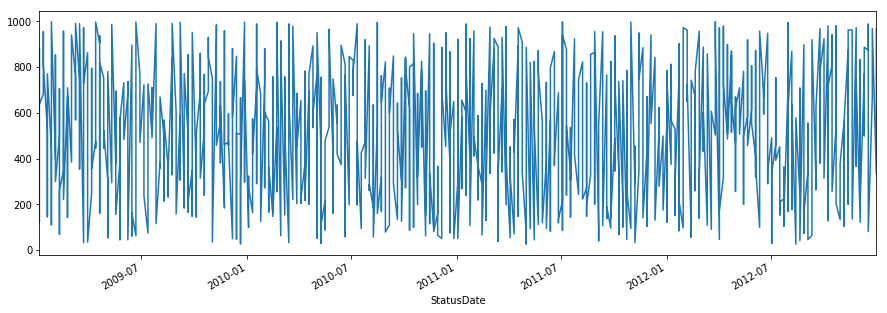

In [25]:
## The semi Colon is important 
df['CustomerCount'].plot(figsize=(15,5));

In [26]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()

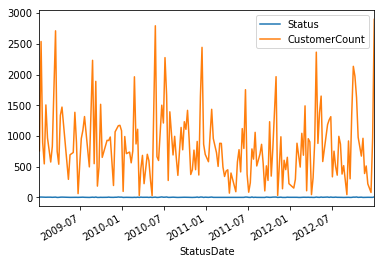

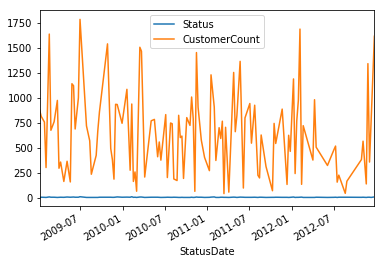

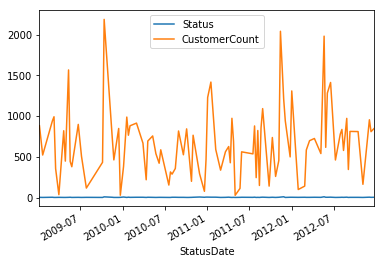

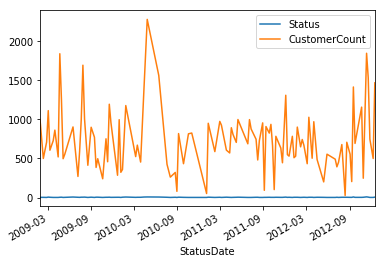

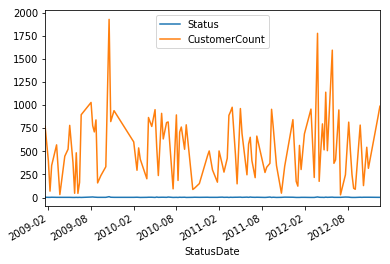

In [27]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['NJ'].plot()
Daily.loc['TX'].plot();

### Ways to Calculate Outliers

In [28]:
# Create a dataframe with dates as your index
States = ['NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL'] 
data = [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
idx = pd.date_range('1/1/2012', periods=10, freq='MS')
df1 = pd.DataFrame(data, index=idx, columns=['Revenue'])
df1['State'] = States

# Create a second dataframe
data2 = [10.0, 10.0, 9, 9, 8, 8, 7, 7, 6, 6]
idx2 = pd.date_range('1/1/2013', periods=10, freq='MS')
df2 = pd.DataFrame(data2, index=idx2, columns=['Revenue'])
df2['State'] = States


# Combine dataframes
df = pd.concat([df1,df2])
df

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


In [ ]:
#### Average and Standard Deviation only for Gaussian dis